# Billboard Hot 100 Analysis &

# Machine Learning Project

### Name: 

- Cesario Angel Ibarra


## Details
Use some supervised learning techniques to determine the top hits of the Billboard Hot 100 (1958 to 2020)
- For this final portion we will use the hot100df_distinct
- working with a shape of (13058,21)
- Data Prep and Preprocessing
- One Hot Encoding
- Scaling
- Model building
- Model Evaluation
## Supervised Learning Part 3

I will use various models to predict the number 1 spot for the Billboard Hot 100

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
import pickle
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Set columns view to max
pd.set_option('display.max_columns', None)

### Import pickled hot100df_distinct

In [2]:
ml_df = pd.read_pickle('hot100df_distinct.pkl')
ml_df

,performer,song_performer,song,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date,rank,last_week,peak_rank,weeks_on_board,key_signature,year
0,Andy Williams,......And Roses And Roses | Andy Williams,......And Roses And Roses,166.106,0.154,0.185,F,-14.063,major,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,1965-05-15,43,36.0,36,7,F major,1965
1,Britney Spears,...Baby One More Time | Britney Spears,...Baby One More Time,211.066,0.759,0.699,C,-5.745,minor,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,1999-06-26,49,46.0,1,32,C minor,1999
2,Paul Davis,'65 Love Affair | Paul Davis,'65 Love Affair,219.813,0.647,0.686,D,-4.247,minor,0.0274,0.43200,0.000006,0.1330,0.952,155.697,4.0,1982-07-10,100,95.0,6,20,D minor,1982
3,Tammy Wynette,'til I Can Make It On My Own | Tammy Wynette,'til I Can Make It On My Own,182.080,0.450,0.294,G,-12.022,major,0.0318,0.83200,0.000035,0.1080,0.146,141.148,4.0,1976-05-29,84,84.0,84,5,G major,1976
4,Luther Vandross,'Til My Baby Comes Home | Luther Vandross,'Til My Baby Comes Home,332.226,0.804,0.714,B,-6.714,minor,0.1830,0.05670,0.000006,0.0253,0.802,139.663,4.0,1985-06-29,99,84.0,29,16,B minor,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,The Trammps,Zing Went The Strings Of My Heart | The Trammps,Zing Went The Strings Of My Heart,202.693,0.667,0.851,E,-5.257,major,0.0629,0.03380,0.000001,0.3180,0.830,120.132,4.0,1972-09-16,65,64.0,64,11,E major,1972
13054,The Five Americans,Zip Code | The Five Americans,Zip Code,175.040,0.393,0.594,A,-5.986,major,0.0267,0.03940,0.000000,0.0479,0.927,139.535,4.0,1967-09-23,58,36.0,36,7,A major,1967
13055,Bad Wolves,Zombie | Bad Wolves,Zombie,254.805,0.448,0.826,D,-3.244,minor,0.0319,0.00756,0.000000,0.1170,0.190,77.093,4.0,2018-07-14,95,90.0,54,17,D minor,2018
13056,Herb Alpert & The Tijuana Brass,Zorba The Greek | Herb Alpert & The Tijuana Brass,Zorba The Greek,264.853,0.531,0.642,F,-12.702,major,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,1966-03-12,43,21.0,11,12,F major,1966


In [3]:
# Check dtypes
print(ml_df.dtypes)

performer                   object
song_performer              object
song                        object
track_duration_s           float64
danceability               float64
energy                     float64
key                         object
loudness                   float64
mode                        object
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature             float64
date                datetime64[ns]
rank                         int64
last_week                  float64
peak_rank                    int64
weeks_on_board               int64
key_signature               object
year                         int64
dtype: object


### Data Preparation Processing
- First we need to OnHotEncode the peak_rank column for predictions
- create a new column top_hit in the ml_df
- set to 1 if value of peak_rank column is less than or equal to 1, and otherwise 0.
- use sklearn to OneHotEncode

In [4]:
# First Import sklearn
from sklearn.preprocessing import OneHotEncoder

In [5]:
ml_df['top_hit'] = np.where(ml_df['peak_rank'] <= 1, 1, 0)

# One-hot encode the top_hit column
encoder = OneHotEncoder(sparse_output=False)
top_hit_encoded = encoder.fit_transform(ml_df[['top_hit']])
top_hit_encoded_df = pd.DataFrame(top_hit_encoded, columns=encoder.get_feature_names_out(['top_hit']))

# Concatenate the one-hot encoded top_hit column with the original DataFrame
ml_df = pd.concat([ml_df, top_hit_encoded_df], axis=1)

# Drop the original top_hit column and the first and sixteenth columns
ml_df = ml_df.drop(['top_hit'], axis=1)

In [6]:
# Rename top_hit_1 to top_hit_pos and drop top_hit_0 negative class
ml_df = ml_df.drop(['top_hit_0'], axis=1)
ml_df = ml_df.rename(columns={'top_hit_1': 'top_hit_pos'})
ml_df

,performer,song_performer,song,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date,rank,last_week,peak_rank,weeks_on_board,key_signature,year,top_hit_pos
0,Andy Williams,......And Roses And Roses | Andy Williams,......And Roses And Roses,166.106,0.154,0.185,F,-14.063,major,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,1965-05-15,43,36.0,36,7,F major,1965,0.0
1,Britney Spears,...Baby One More Time | Britney Spears,...Baby One More Time,211.066,0.759,0.699,C,-5.745,minor,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,1999-06-26,49,46.0,1,32,C minor,1999,1.0
2,Paul Davis,'65 Love Affair | Paul Davis,'65 Love Affair,219.813,0.647,0.686,D,-4.247,minor,0.0274,0.43200,0.000006,0.1330,0.952,155.697,4.0,1982-07-10,100,95.0,6,20,D minor,1982,0.0
3,Tammy Wynette,'til I Can Make It On My Own | Tammy Wynette,'til I Can Make It On My Own,182.080,0.450,0.294,G,-12.022,major,0.0318,0.83200,0.000035,0.1080,0.146,141.148,4.0,1976-05-29,84,84.0,84,5,G major,1976,0.0
4,Luther Vandross,'Til My Baby Comes Home | Luther Vandross,'Til My Baby Comes Home,332.226,0.804,0.714,B,-6.714,minor,0.1830,0.05670,0.000006,0.0253,0.802,139.663,4.0,1985-06-29,99,84.0,29,16,B minor,1985,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,The Trammps,Zing Went The Strings Of My Heart | The Trammps,Zing Went The Strings Of My Heart,202.693,0.667,0.851,E,-5.257,major,0.0629,0.03380,0.000001,0.3180,0.830,120.132,4.0,1972-09-16,65,64.0,64,11,E major,1972,0.0
13054,The Five Americans,Zip Code | The Five Americans,Zip Code,175.040,0.393,0.594,A,-5.986,major,0.0267,0.03940,0.000000,0.0479,0.927,139.535,4.0,1967-09-23,58,36.0,36,7,A major,1967,0.0
13055,Bad Wolves,Zombie | Bad Wolves,Zombie,254.805,0.448,0.826,D,-3.244,minor,0.0319,0.00756,0.000000,0.1170,0.190,77.093,4.0,2018-07-14,95,90.0,54,17,D minor,2018,0.0
13056,Herb Alpert & The Tijuana Brass,Zorba The Greek | Herb Alpert & The Tijuana Brass,Zorba The Greek,264.853,0.531,0.642,F,-12.702,major,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,1966-03-12,43,21.0,11,12,F major,1966,0.0


In [7]:
# Let's drop the date column, this is unnecessary
ml_df = ml_df.drop(['date'], axis=1)
ml_df

,performer,song_performer,song,track_duration_s,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,rank,last_week,peak_rank,weeks_on_board,key_signature,year,top_hit_pos
0,Andy Williams,......And Roses And Roses | Andy Williams,......And Roses And Roses,166.106,0.154,0.185,F,-14.063,major,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,43,36.0,36,7,F major,1965,0.0
1,Britney Spears,...Baby One More Time | Britney Spears,...Baby One More Time,211.066,0.759,0.699,C,-5.745,minor,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,49,46.0,1,32,C minor,1999,1.0
2,Paul Davis,'65 Love Affair | Paul Davis,'65 Love Affair,219.813,0.647,0.686,D,-4.247,minor,0.0274,0.43200,0.000006,0.1330,0.952,155.697,4.0,100,95.0,6,20,D minor,1982,0.0
3,Tammy Wynette,'til I Can Make It On My Own | Tammy Wynette,'til I Can Make It On My Own,182.080,0.450,0.294,G,-12.022,major,0.0318,0.83200,0.000035,0.1080,0.146,141.148,4.0,84,84.0,84,5,G major,1976,0.0
4,Luther Vandross,'Til My Baby Comes Home | Luther Vandross,'Til My Baby Comes Home,332.226,0.804,0.714,B,-6.714,minor,0.1830,0.05670,0.000006,0.0253,0.802,139.663,4.0,99,84.0,29,16,B minor,1985,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13053,The Trammps,Zing Went The Strings Of My Heart | The Trammps,Zing Went The Strings Of My Heart,202.693,0.667,0.851,E,-5.257,major,0.0629,0.03380,0.000001,0.3180,0.830,120.132,4.0,65,64.0,64,11,E major,1972,0.0
13054,The Five Americans,Zip Code | The Five Americans,Zip Code,175.040,0.393,0.594,A,-5.986,major,0.0267,0.03940,0.000000,0.0479,0.927,139.535,4.0,58,36.0,36,7,A major,1967,0.0
13055,Bad Wolves,Zombie | Bad Wolves,Zombie,254.805,0.448,0.826,D,-3.244,minor,0.0319,0.00756,0.000000,0.1170,0.190,77.093,4.0,95,90.0,54,17,D minor,2018,0.0
13056,Herb Alpert & The Tijuana Brass,Zorba The Greek | Herb Alpert & The Tijuana Brass,Zorba The Greek,264.853,0.531,0.642,F,-12.702,major,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,43,21.0,11,12,F major,1966,0.0


In [8]:
print(ml_df.dtypes)

performer            object
song_performer       object
song                 object
track_duration_s    float64
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
rank                  int64
last_week           float64
peak_rank             int64
weeks_on_board        int64
key_signature        object
year                  int64
top_hit_pos         float64
dtype: object


### Now let's finish up Preprocessing

In [9]:
# Import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Split into inputs and outputs
X = ml_df.drop(columns='top_hit_pos')
y = ml_df['top_hit_pos']

In [11]:
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [12]:
# define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

In [13]:
# Apply the transformations to the data
X_transformed = col_transform.fit_transform(X)

### Split for train test and import rft classifier

In [14]:
# Import Libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [15]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

### Create Random Forest Classifier model

In [16]:
# Create and fit the Random Forest model
rfcl = RandomForestClassifier()
rfcl.fit(X_train, y_train)

RandomForestClassifier()

### Make Prediction with test set and evaluate model performance

In [17]:
# Make predictions on the test set
y_pred = rfcl.predict(X_test)

In [18]:
# Evaluate the model preformance
accuracy = rfcl.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### Visualize with a confusion matrix
- from sklearn.metrcis import cm 

In [19]:
from sklearn.metrics import confusion_matrix

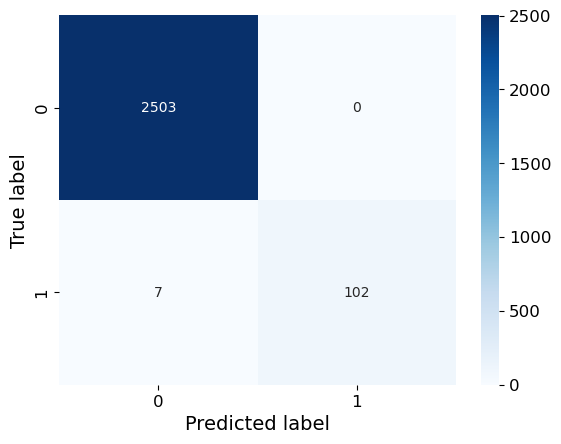

In [20]:
# create confusion matrix object
rfcl_cm = confusion_matrix(y_test, y_pred)

# Create a heatmap plot of the confusion matrix
sns.heatmap(rfcl_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Evaluate model scores

In [21]:
# import libs for metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
# Calculate the accuracy, precision, and recall scores for the RandomForestClassifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the accuracy, precision, and recall scores for the RandomForestClassifier
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 0.94
F1-score: 0.97


### Let's try a KNN Classifier

In [23]:
# Import libs
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Create and fit KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Make Prediction with test set and evaluate model performance

In [25]:
# Make predictions on the test set
knn_y_pred = knn.predict(X_test)

In [26]:
# Evaluate the model preformance
knn_accuracy = knn.score(X_test, y_test)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

KNN Accuracy: 0.96


In [27]:
# Calculate the accuracy, precision, and recall scores for the KNN
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

# Print the accuracy, precision, and recall scores for the KNN
print(f'KNN Accuracy: {knn_accuracy:.2f}')
print(f'KNN Precision: {knn_precision:.2f}')
print(f'KNN Recall: {knn_recall:.2f}')
print(f'KNN F1-score: {knn_f1:.2f}')

KNN Accuracy: 0.96
KNN Precision: 0.38
KNN Recall: 0.03
KNN F1-score: 0.05


# BOOM
### We can see the RandomForestClassifier is most suited for predictions
- with a Precision score of 1
- and a Recall score of .75

### Thirdly, Let's try a SVM

In [28]:
# Import lib
from sklearn.svm import SVC

In [29]:
# Create a SVM classifier with a linear kernel
svc_model = SVC(kernel='linear')
# Train the classifier on the training data
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
# Make predictions on the test data
svc_y_pred = svc_model.predict(X_test)

In [31]:
# Calculate the accuracy, precision, and recall scores for SVC
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_precision = precision_score(y_test, svc_y_pred)
svc_recall = recall_score(y_test, svc_y_pred)
svc_f1 = f1_score(y_test, svc_y_pred)

# Print the accuracy, precision, and recall scores for SVC
print(f'SVC Accuracy: {svc_accuracy:.2f}')
print(f'SVC Precision: {svc_precision:.2f}')
print(f'SVC Recall: {svc_recall:.2f}')
print(f'SVC F1-score: {svc_f1:.2f}')

SVC Accuracy: 0.96
SVC Precision: 0.77
SVC Recall: 0.18
SVC F1-score: 0.30


### Pickle ml_df

In [33]:
ml_df.to_csv('ml_df.csv')